In [114]:
# remove duplicate columns
from pandas.io.parsers import read_csv
df = read_csv('all_cases.csv', sep = ';')
columns = []
for i in range(0, len(df.columns)):
    if str(df.columns[i]).find('.', 0, len(str(df.columns[i]))) != -1:
        columns.append(str(df.columns[i]))
    
df.drop(columns, inplace=True, axis=1)
df.head()

,bactec_test_lfx,accumulation_of_contrast,drug_susceptibility_testing_km,bactec_test_h,ex_prisoner,hain_test_e,education,drug_susceptibility_testing_s,co_morbidity,comments,...,treatment_regimen_cs,bactec_test_amx_clv,drug_susceptibility_testing_amx_clv,lifestyle_smoking,treatment_regimen_cm,affected_segments,treatment_regimen_r,culture_result,dissemination,affect_level
0,resistant,0,sensitive,sensitive,0,0,complete school (a-level,0,1,NaN,...,include,0,0,0,include,s7-10,notinclude,1,0,lower lobe
1,0,0,0,0,0,0,college (bachelor),0,0,NaN,...,notinclude,0,0,0,notinclude,s1+2,include,1,0,upper lobe
2,resistant,0,resistant,sensitive,0,0,higher (university),sensitive,1,NaN,...,include,0,0,0,notinclude,total,notinclude,1,0,total
3,0,0,resistant,0,0,0,higher (university),0,1,NaN,...,include,0,resistant,0,notinclude,total,notinclude,1,0,total
4,0,0,resistant,0,0,resistant,complete school (a-level,0,1,NaN,...,include,0,0,0,include,s1-3,notinclude,1,1,upper lobe


In [115]:
# прямое кодирование на номинальных признаках
import pandas as pd
columns = ['education', 'habitation', 'job', 'treatment_result', 'result_of_previous_treatment', 'drug_susceptibility_testing_am', 'drug_susceptibility_testing_amx_clv', 'drug_susceptibility_testing_cm', 'drug_susceptibility_testing_cs', 'drug_susceptibility_testing_e', 'drug_susceptibility_testing_h', 'drug_susceptibility_testing_km', 'drug_susceptibility_testing_lfx', 'drug_susceptibility_testing_mb', 'drug_susceptibility_testing_mfx', 'drug_susceptibility_testing_ofx', 'drug_susceptibility_testing_pas', 'drug_susceptibility_testing_pto', 'drug_susceptibility_testing_r', 'drug_susceptibility_testing_s', 'drug_susceptibility_testing_z']
df1 = pd.get_dummies(df[columns])
df_new = df.join(df1, how='inner')
df_new.head()

,bactec_test_lfx,accumulation_of_contrast,drug_susceptibility_testing_km,bactec_test_h,ex_prisoner,hain_test_e,education,drug_susceptibility_testing_s,co_morbidity,comments,...,drug_susceptibility_testing_pto_sensitive,drug_susceptibility_testing_r_0,drug_susceptibility_testing_r_resistant,drug_susceptibility_testing_r_sensitive,drug_susceptibility_testing_s_0,drug_susceptibility_testing_s_resistant,drug_susceptibility_testing_s_sensitive,drug_susceptibility_testing_z_0,drug_susceptibility_testing_z_resistant,drug_susceptibility_testing_z_sensitive
0,resistant,0,sensitive,sensitive,0,0,complete school (a-level,0,1,NaN,...,0,0,0,1,1,0,0,1,0,0
1,0,0,0,0,0,0,college (bachelor),0,0,NaN,...,0,1,0,0,1,0,0,1,0,0
2,resistant,0,resistant,sensitive,0,0,higher (university),sensitive,1,NaN,...,0,0,0,1,0,0,1,0,0,1
3,0,0,resistant,0,0,0,higher (university),0,1,NaN,...,1,0,0,1,1,0,0,1,0,0
4,0,0,resistant,0,0,resistant,complete school (a-level,0,1,NaN,...,0,0,0,1,1,0,0,0,1,0


In [116]:
df_new.isnull().sum()

bactec_test_lfx                                0
accumulation_of_contrast                       0
drug_susceptibility_testing_km                 0
bactec_test_h                                  0
ex_prisoner                                    0
hain_test_e                                    0
education                                      0
drug_susceptibility_testing_s                  0
co_morbidity                                   0
comments                                     784
hain_test_culture                              0
drug_susceptibility_testing_r                  0
bactec_test_mfx                                0
nodi_calcinatum                                0
treatment_regimen_pas                          0
drug_susceptibility_testing_ofx                0
lung_capacity_decrease                         0
gene_test_r                                    0
height_cm                                      0
treatment_regimen_ofx                          0
drug_susceptibility_

In [117]:
df = df_new.dropna(subset=['result_of_previous_treatment_new', 'result_of_previous_treatment_relapse', 'result_of_previous_treatment_treatmentafterfailure', 'result_of_previous_treatment_treatmentafterdefault', 'result_of_previous_treatment_unknown', 'result_of_previous_treatment_other', 'surgery_treatment', 'msc_treatment', 'smear_result', 'culture_result' , 'co_morbidity', 'height_cm', 'weight_cm', 'disability_level', 'symptoms_of_tb', 'education_complete school (a-level', 'education_college (bachelor)', 'education_higher (university)', 'habitation_private house', 'habitation_flat', 'habitation_dormitory', 'habitation_homeless', 'ex_prisoner', 'lifestyle_alcoholic', 'lifestyle_addict', 'lifestyle_smoking', 'job_employment', 'job_unemployed', 'job_student', 'job_retiree', 'job_invalid', 'hiv', 'art', 'anomaly_development_of_mediastinum_vessels', 'anomaly_of_lung_develop', 'bronchial_obstruction', 'dissemination', 'lung_capacity_decrease', 'lymphoadenopatia', 'nodi_calcinatum', 'plevritis', 'pneumothorax', 'treatment_result_incomplete', 'treatment_result_failure', 'treatment_result_successful', 'treatment_result_complete', 'treatment_result_default', 'treatment_result_death', 'treatment_result_other'])
df.head()

,bactec_test_lfx,accumulation_of_contrast,drug_susceptibility_testing_km,bactec_test_h,ex_prisoner,hain_test_e,education,drug_susceptibility_testing_s,co_morbidity,comments,...,drug_susceptibility_testing_pto_sensitive,drug_susceptibility_testing_r_0,drug_susceptibility_testing_r_resistant,drug_susceptibility_testing_r_sensitive,drug_susceptibility_testing_s_0,drug_susceptibility_testing_s_resistant,drug_susceptibility_testing_s_sensitive,drug_susceptibility_testing_z_0,drug_susceptibility_testing_z_resistant,drug_susceptibility_testing_z_sensitive
0,resistant,0,sensitive,sensitive,0,0,complete school (a-level,0,1,NaN,...,0,0,0,1,1,0,0,1,0,0
1,0,0,0,0,0,0,college (bachelor),0,0,NaN,...,0,1,0,0,1,0,0,1,0,0
2,resistant,0,resistant,sensitive,0,0,higher (university),sensitive,1,NaN,...,0,0,0,1,0,0,1,0,0,1
3,0,0,resistant,0,0,0,higher (university),0,1,NaN,...,1,0,0,1,1,0,0,1,0,0
4,0,0,resistant,0,0,resistant,complete school (a-level,0,1,NaN,...,0,0,0,1,1,0,0,0,1,0


In [161]:
# разделение на тренировочную и тестовую выборки
columns = ['result_of_previous_treatment_new', 'result_of_previous_treatment_relapse', 'result_of_previous_treatment_treatmentafterfailure', 'result_of_previous_treatment_treatmentafterdefault', 'result_of_previous_treatment_unknown', 'result_of_previous_treatment_other', 'surgery_treatment', 'msc_treatment', 'smear_result', 'culture_result' , 'co_morbidity', 'height_cm', 'weight_cm', 'disability_level', 'symptoms_of_tb', 'education_complete school (a-level', 'education_college (bachelor)', 'education_higher (university)', 'habitation_private house', 'habitation_flat', 'habitation_dormitory', 'habitation_homeless', 'ex_prisoner', 'lifestyle_alcoholic', 'lifestyle_addict', 'lifestyle_smoking', 'job_employment', 'job_unemployed', 'job_student', 'job_retiree', 'job_invalid', 'hiv', 'art', 'anomaly_development_of_mediastinum_vessels', 'anomaly_of_lung_develop', 'bronchial_obstruction', 'dissemination', 'lung_capacity_decrease', 'lymphoadenopatia', 'nodi_calcinatum', 'plevritis', 'pneumothorax']
df_for = df[columns]
X = df_for.values
columns = ['treatment_result_incomplete', 'treatment_result_failure', 'treatment_result_successful', 'treatment_result_complete', 'treatment_result_default', 'treatment_result_death', 'treatment_result_other']
y = df[columns].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [166]:
import numpy as np
from numpy import array
aa = []
bb = []
cc = []
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_for.columns[1:]
#forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    if importances[indices[f]] > 0.03:
        #importan.append(importances[indices[f]])
        aa.append(indices[f])
        bb.append(feat_labels[indices[f]])
        cc.append(importances[indices[f]])
        print("%2d) %-*s %f" % (f + 1, 30,
                                feat_labels[indices[f]],
                                importances[indices[f]]))
indic = array(aa)
feat_l = array(bb)
importan = array(cc)

 1) disability_level               0.145222
 2) weight_cm                      0.144136
 3) co_morbidity                   0.061880
 4) dissemination                  0.039998
 5) culture_result                 0.030749
 6) result_of_previous_treatment_relapse 0.030721


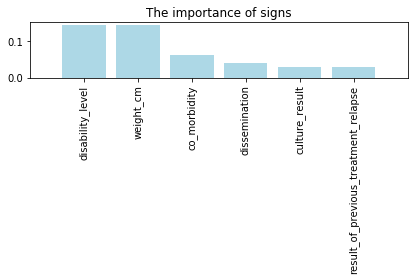

In [171]:
import matplotlib.pyplot as plt
plt.title('The importance of signs')
plt.bar(range(indic.shape[0]), importances[indic],
       color = 'lightblue', align='center')
plt.xticks(range(indic.shape[0]),
          feat_labels[indic], rotation=90)
plt.xlim([-1, indic.shape[0]])
plt.tight_layout()
plt.show()

In [172]:
# разделение на тренировочную и тестовую выборки
columns = ['result_of_previous_treatment_new', 'result_of_previous_treatment_relapse', 'result_of_previous_treatment_treatmentafterfailure', 'result_of_previous_treatment_treatmentafterdefault', 'result_of_previous_treatment_unknown', 'result_of_previous_treatment_other', 'surgery_treatment', 'msc_treatment', 'smear_result', 'culture_result' , 'co_morbidity', 'height_cm', 'weight_cm', 'disability_level', 'symptoms_of_tb', 'education_complete school (a-level', 'education_college (bachelor)', 'education_higher (university)', 'habitation_private house', 'habitation_flat', 'habitation_dormitory', 'habitation_homeless', 'ex_prisoner', 'lifestyle_alcoholic', 'lifestyle_addict', 'lifestyle_smoking', 'job_employment', 'job_unemployed', 'job_student', 'job_retiree', 'job_invalid', 'hiv', 'art', 'anomaly_development_of_mediastinum_vessels', 'anomaly_of_lung_develop', 'bronchial_obstruction', 'dissemination', 'lung_capacity_decrease', 'lymphoadenopatia', 'nodi_calcinatum', 'plevritis', 'pneumothorax']
df_for=df[columns]
X1 = df_for.values
columns = ['treatment_result_death']
y1 = df[columns].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3,random_state=0)

In [175]:
import numpy as np
from numpy import array
aa = []
bb = []
cc = []
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_for.columns[1:]
#forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    if importances[indices[f]] > 0.05:
        #importan.append(importances[indices[f]])
        aa.append(indices[f])
        bb.append(feat_labels[indices[f]])
        cc.append(importances[indices[f]])
        print("%2d) %-*s %f" % (f + 1, 30,
                                feat_labels[indices[f]],
                                importances[indices[f]]))
indic = array(aa)
feat_l = array(bb)
importan = array(cc)

c:\users\user\envs\labs\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


 1) weight_cm                      0.142887
 2) disability_level               0.121819
 3) lung_capacity_decrease         0.080853
 4) nodi_calcinatum                0.074275
 5) culture_result                 0.072210
 6) job_student                    0.054162


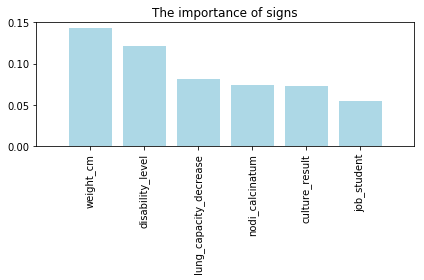

In [176]:
import matplotlib.pyplot as plt
plt.title('The importance of signs')
plt.bar(range(indic.shape[0]), importances[indic],
       color = 'lightblue', align='center')
plt.xticks(range(indic.shape[0]),
          feat_labels[indic], rotation=90)
plt.xlim([-1, indic.shape[0]])
plt.tight_layout()
plt.show()

In [184]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)

In [185]:
# Верность
from sklearn.metrics import accuracy_score
print('Верность: %.2f' % accuracy_score(y_test, y_tree_pred))

Верность: 0.97


In [187]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix
tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_tree_pred)
print(confmat)

[[143   1]
 [  4   0]]


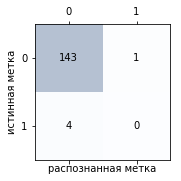

In [188]:
# Визуализация матрицы ошибок
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i, j],
               va='center', ha='center')
plt.xlabel('распознанная метка')
plt.ylabel('истинная метка')
plt.show()

In [53]:
df.isnull().sum()
# with open('missing.txt', 'w') as f:
#     f.write(str(stt))

bactec_test_lfx                              0
accumulation_of_contrast                     0
drug_susceptibility_testing_km               0
bactec_test_h                                0
ex_prisoner                                  0
hain_test_e                                  0
education                                    0
drug_susceptibility_testing_s                0
co_morbidity                                 0
comments                                   392
hain_test_culture                            0
drug_susceptibility_testing_r                0
bactec_test_mfx                              0
nodi_calcinatum                              0
treatment_regimen_pas                        0
drug_susceptibility_testing_ofx              0
lung_capacity_decrease                       0
gene_test_r                                  0
height_cm                                    0
treatment_regimen_ofx                        0
drug_susceptibility_testing_e                0
treatment_res